In [2]:
import pandas as pd

sales = pd.read_csv('train.csv')

sales.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


# Exploratory Data Analysis

In [3]:
# Checking value dtypes per column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [4]:
# Checking null values in each column
sales.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

[]

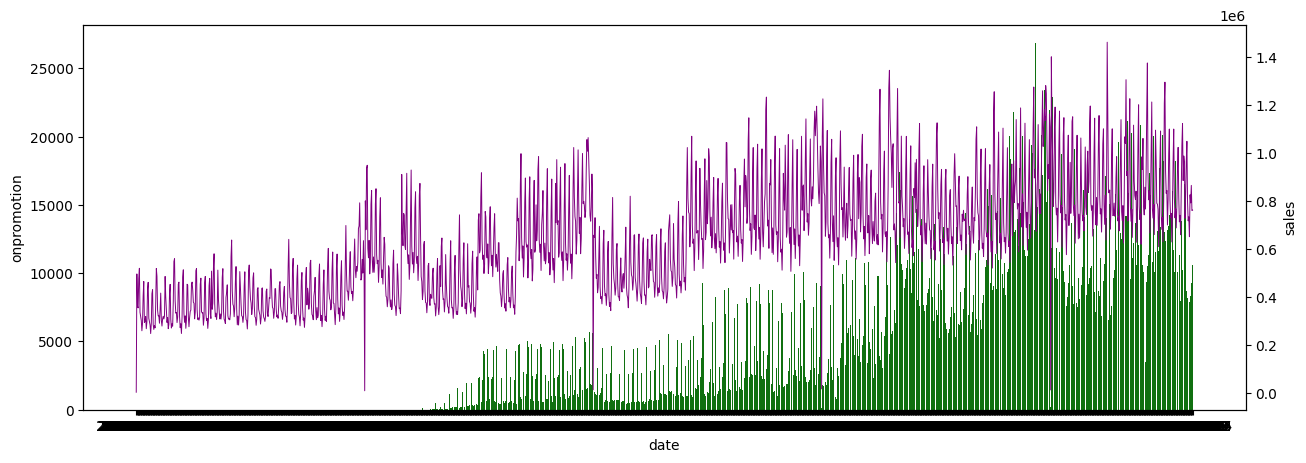

In [5]:
# Showing overall changes of promotions and sales
import matplotlib.pyplot as plt
import seaborn as sns

sales_group = sales.groupby(['date']).sum()[['onpromotion','sales']]

fig = plt.figure(figsize=(15,5))
sns.barplot(data = sales_group,
            x = sales_group.index,
            y = 'onpromotion',
            color = 'g')
ax2 = plt.twinx()
sns.lineplot(data = sales_group,
             x = sales_group.index,
             y = 'sales',
             ax = ax2,
             color = 'purple',
             linewidth = 0.7)
plt.plot()

In [6]:
# Calculating coefficient to gain rough idea of correlation between promotion and sales
sales[['sales','onpromotion']].corr()

,sales,onpromotion
sales,1.000000,0.427923
onpromotion,0.427923,1.000000


In [7]:
sales_group

,onpromotion,sales
date,,
2013-01-01,0,2511.618999
2013-01-02,0,496092.417944
2013-01-03,0,361461.231124
2013-01-04,0,354459.677093
2013-01-05,0,477350.121229
...,...,...
2017-08-11,14179,826373.722022
2017-08-12,8312,792630.535079
2017-08-13,9283,865639.677471


In [8]:
sales_group.index = pd.to_datetime(sales_group.index)
sales_group

,onpromotion,sales
date,,
2013-01-01,0,2511.618999
2013-01-02,0,496092.417944
2013-01-03,0,361461.231124
2013-01-04,0,354459.677093
2013-01-05,0,477350.121229
...,...,...
2017-08-11,14179,826373.722022
2017-08-12,8312,792630.535079
2017-08-13,9283,865639.677471


In [9]:
from datetime import date
d0 = date(2013,1,1)
d1 = date(2017,8,15)
delta = d1-d0
print(delta.days)


1687


In [10]:
sales_group = sales_group.reindex(pd.date_range(sales_group.index.min(),
                                                sales_group.index.max(),
                                                freq = 'D'))
sales_group.isnull().sum()

onpromotion    4
sales          4
dtype: int64

In [11]:
sales_group = sales_group.interpolate('linear')
sales_group.isnull().sum()

onpromotion    0
sales          0
dtype: int64

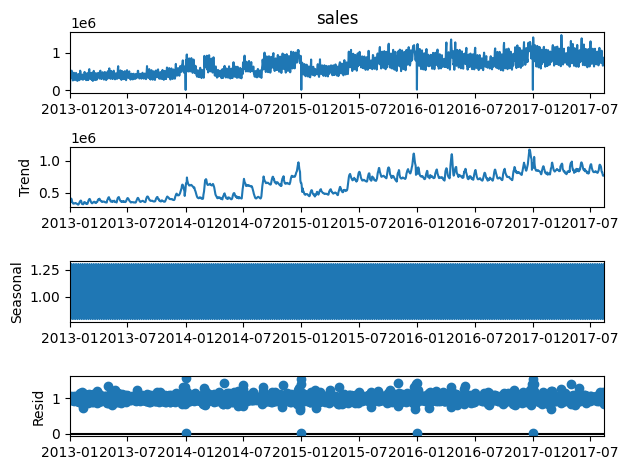

In [12]:
# Decomposing sales data
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(sales_group['sales'], model = 'multiplicative')
result_add.plot();

No clear trend identified

In [13]:
family_group = sales.groupby(['family','date']).sum()[['sales','onpromotion']].reset_index('date')
family_group

,date,sales,onpromotion
family,,,
AUTOMOTIVE,2013-01-01,0.000000,0
AUTOMOTIVE,2013-01-02,255.000000,0
AUTOMOTIVE,2013-01-03,161.000000,0
AUTOMOTIVE,2013-01-04,169.000000,0
AUTOMOTIVE,2013-01-05,342.000000,0
...,...,...,...
SEAFOOD,2017-08-11,1272.615997,137
SEAFOOD,2017-08-12,1028.030006,41
SEAFOOD,2017-08-13,1118.047000,1


In [15]:
temp = family_group.loc[family_group.index == 'AUTOMOTIVE']
temp

,date,sales,onpromotion
family,,,
AUTOMOTIVE,2013-01-01,0.0,0
AUTOMOTIVE,2013-01-02,255.0,0
AUTOMOTIVE,2013-01-03,161.0,0
AUTOMOTIVE,2013-01-04,169.0,0
AUTOMOTIVE,2013-01-05,342.0,0
...,...,...,...
AUTOMOTIVE,2017-08-11,441.0,0
AUTOMOTIVE,2017-08-12,403.0,1
AUTOMOTIVE,2017-08-13,481.0,0


<AxesSubplot:xlabel='date', ylabel='onpromotion'>

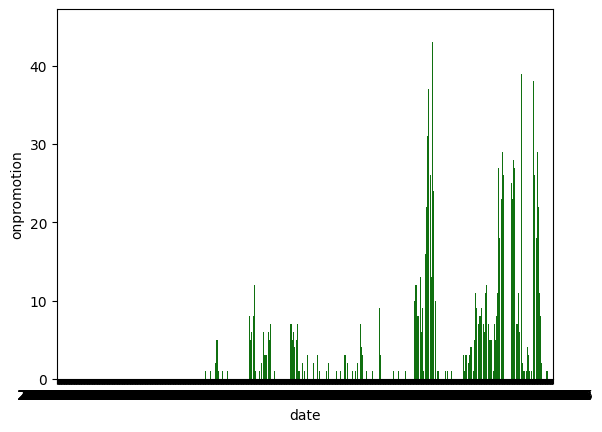

In [16]:
sns.barplot(data = temp,
            x = 'date',
            y = 'onpromotion',
            color = 'g')

In [17]:
# for f in sales.family.unique():
temp = family_group.loc[family_group.index == 'AUTOMOTIVE']

fig = plt.figure(figsize=(15,5))
sns.barplot(data = temp,
            x = 'date',
            y = 'onpromotion',
            color = 'g')
ax2 = plt.twinx()
sns.lineplot(data = temp,
            x = 'date',
            y = 'sales',
            ax = ax2,
            color = 'purple',
            linewidth = 0.7)
plt.plot()